**PARKINSON'S DISEASE**

**The first Neurological syndrome to be ever discovered**

**With its first medical description written in 1817, finding the right medicine is still a challenge in medical world**

**However, we can garner much comfort in the following words:**

*   **"Prevention is better than cure"**


**Data Science aids in a number of ways to predict this syndrome based on patient data, beforehand.**

##### **Dataset**

In [ ]:
import pandas as pd

In [ ]:
ps = pd.read_csv("parkinsons_data.csv")

In [ ]:
ps.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Renaming column variable names

ps = ps.rename(columns = {       "MDVP:Flo(Hz)"      :   "MDVP_Flo(Hz)",
                                 "MDVP:Fhi(Hz)"      :   "MDVP_Fhi(Hz)",
                                 "MDVP:Fo(Hz)"      :   "MDVP_Fo(Hz)",
                                 "MDVP:Jitter(%)"    :   "MDVP_Jitter(percentage)",
                                 "MDVP:Jitter(Abs)"  :   "MDVP_Jitter(Abs)",
                                 "MDVP:RAP"          :   "MDVP_RAP",
                                 "MDVP:PPQ"          :   "MDVP_PPQ",
                                 "Jitter:DDP"        :   "Jitter_DDP",
                                 "MDVP:Shimmer"      :   "MDVP_Shimmer",
                                 "MDVP:Shimmer(dB)"  :   "MDVP_Shimmer(dB)",
                                 "Shimmer:APQ3"      :   "Shimmer_APQ3",
                                 "Shimmer:APQ5"      :   "Shimmer_APQ5",
                                 "MDVP:APQ"          :   "MDVP_APQ",
                                 "Shimmer:DDA"       :   "Shimmer_DDA"      })

In [ ]:
ps.head()

,name,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(percentage),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer(dB),Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
ps.shape

(195, 24)

In [ ]:
ps.isnull().sum().sum()

0

In [ ]:
ps.dtypes

name                        object
MDVP_Fo(Hz)                float64
MDVP_Fhi(Hz)               float64
MDVP_Flo(Hz)               float64
MDVP_Jitter(percentage)    float64
MDVP_Jitter(Abs)           float64
MDVP_RAP                   float64
MDVP_PPQ                   float64
Jitter_DDP                 float64
MDVP_Shimmer               float64
MDVP_Shimmer(dB)           float64
Shimmer_APQ3               float64
Shimmer_APQ5               float64
MDVP_APQ                   float64
Shimmer_DDA                float64
NHR                        float64
HNR                        float64
status                       int64
RPDE                       float64
DFA                        float64
spread1                    float64
spread2                    float64
D2                         float64
PPE                        float64
dtype: object

In [ ]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     195 non-null    object 
 1   MDVP_Fo(Hz)              195 non-null    float64
 2   MDVP_Fhi(Hz)             195 non-null    float64
 3   MDVP_Flo(Hz)             195 non-null    float64
 4   MDVP_Jitter(percentage)  195 non-null    float64
 5   MDVP_Jitter(Abs)         195 non-null    float64
 6   MDVP_RAP                 195 non-null    float64
 7   MDVP_PPQ                 195 non-null    float64
 8   Jitter_DDP               195 non-null    float64
 9   MDVP_Shimmer             195 non-null    float64
 10  MDVP_Shimmer(dB)         195 non-null    float64
 11  Shimmer_APQ3             195 non-null    float64
 12  Shimmer_APQ5             195 non-null    float64
 13  MDVP_APQ                 195 non-null    float64
 14  Shimmer_DDA              1

In [ ]:
from collections import Counter
Counter(ps["status"])

Counter({0: 48, 1: 147})

In [ ]:
ps = ps.drop(columns=["name"], axis=1)

**Column Attributes**

*   name - ASCII subject name and recording number item
*   MDVP:Fo(Hz) - Average vocal fundamental frequency
*   MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
*   MDVP:Flo(Hz) - Minimum vocal fundamental frequency
*   MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
*   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
*   NHR,HNR - Two measures of ratio of noise to tonal components in the voice
*   status - Health status of the subject (one) - Parkinson's, (zero) - healthy
*   RPDE,D2 - Two nonlinear dynamical complexity measures
*   DFA - Signal fractal scaling exponent
*   spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation


##### **Dataset visualizations**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([12., 54., 20., 31., 17., 18., 21.,  8.,  9.,  5.]),
 array([ 88.333 , 105.5102, 122.6874, 139.8646, 157.0418, 174.219 ,
        191.3962, 208.5734, 225.7506, 242.9278, 260.105 ]),
 <a list of 10 Patch objects>)

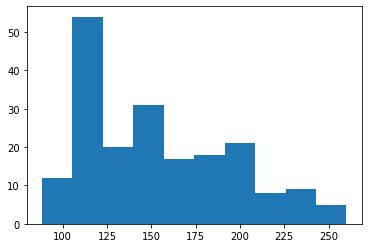

In [ ]:
plt.hist(ps["MDVP_Fo(Hz)"])

(array([69., 47., 53., 14.,  0.,  1.,  3.,  3.,  0.,  5.]),
 array([102.145 , 151.1335, 200.122 , 249.1105, 298.099 , 347.0875,
        396.076 , 445.0645, 494.053 , 543.0415, 592.03  ]),
 <a list of 10 Patch objects>)

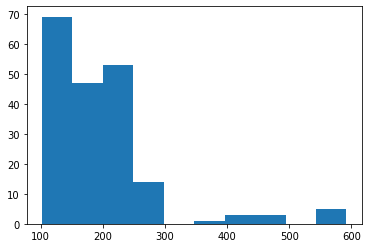

In [ ]:
plt.hist(ps["MDVP_Fhi(Hz)"])

##### **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

X = ps.drop(columns=["status"], axis=1)
y = ps.status

stdscaler = StandardScaler()
scaled_features = stdscaler.fit_transform(X)
scaled_features_df = pd.DataFrame(scaled_features, columns = X.columns)

In [ ]:
ps = scaled_features_df.join(y)

In [ ]:
ps.head()

,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(percentage),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer(dB),Shimmer_APQ3,Shimmer_APQ5,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1


In [ ]:
ps.isna().sum().sum()

0

##### **Train-Test-Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136, 22), (59, 22), (136,), (59,))

##### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# prediction

y_pred = linear.predict(X_test)

In [ ]:
y_pred

array([ 0.43033102,  0.94605859,  1.14368342,  1.00901774,  0.32692501,
        0.99771041,  0.54450172,  0.64415281,  0.8615537 ,  0.90496438,
        0.57425697,  1.01749661,  0.96710897,  1.05360686,  0.55416711,
        0.28937916,  1.07506108,  0.88480138,  0.58694858,  0.89060226,
        1.17120625,  0.55632034,  0.40796751,  0.77801702,  0.96969239,
        0.78962277,  0.94341001,  1.06833549, -0.01559358,  0.0954814 ,
        0.88043804,  0.75489811,  1.00866281,  0.14456458,  0.24133406,
        0.70588443,  0.56484986,  0.98998604,  0.08440991,  0.68555533,
        0.67134249,  0.59500217,  0.84745379,  1.15414115,  0.64092664,
        0.82140909,  0.99668013,  0.57524173,  0.75932344,  1.14162667,
        0.82767855,  0.19812014,  0.88384756,  1.33018187,  0.91726747,
        0.48686902,  0.77155755,  0.83930459,  0.91889386])

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred.round(), y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred.round(), y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred.round(), y_test))

1. Accuracy Score of  -  0.8813559322033898


2. Confusion Matrix - 
 [[10  1]
 [ 6 42]]


3. Classification_report - 

               precision    recall  f1-score   support

         0.0       0.62      0.91      0.74        11
         1.0       0.98      0.88      0.92        48

    accuracy                           0.88        59
   macro avg       0.80      0.89      0.83        59
weighted avg       0.91      0.88      0.89        59



Confusion Matrix:

*   TP FP
*   FN TN



In [ ]:
linear.score(X_test, y_pred.round())

0.5926322444292089

In [ ]:
linear.score(X_test, y_pred.round())

0.5926322444292089

In [ ]:
y_test.shape, y_pred.round().shape

((59,), (59,))

In [ ]:
# for i,j in enumerate(y_pred):
#   if 

In [ ]:
import numpy as np
o = [0.77, 4.65, 0.56, 0.51]
k = np.array(o)
k.round()

array([1., 5., 1., 1.])

In [ ]:
Counter(y_test)

Counter({0: 16, 1: 43})

In [ ]:
Counter(y_pred.round())

Counter({0.0: 11, 1.0: 48})

*   **43 cases of Parkinson's in test data**
*   **48 cases of Parkinson's in pred data**



*   **16 cases of non-Parkinson's in test data**
*   **11 cases of non-Parkinson's in pred data**



In [ ]:
Counter(np.abs(y_test - y_pred.round()))

Counter({0.0: 52, 1.0: 7})

**As said theoretically, linear regression don't do well on non-linear variables**

**Check these** 


*   https://stats.stackexchange.com/questions/405961/is-there-formal-test-of-non-linearity-in-linear-regression
*   https://www.pluralsight.com/guides/non-linear-regression-trees-scikit-learn

##### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

logistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Prediction

y_pred = logistic.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Classification Report

# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.8813559322033898


2. Confusion Matrix - 
 [[10  1]
 [ 6 42]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.62      0.91      0.74        11
           1       0.98      0.88      0.92        48

    accuracy                           0.88        59
   macro avg       0.80      0.89      0.83        59
weighted avg       0.91      0.88      0.89        59



In [ ]:
logistic.score(X_test, y_test)

0.8813559322033898

**Non-Linear Regression**



*   DT
*   RF
*   SVM
*   kNN





##### **Support Vector Machines**

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Prediction

y_pred = svm.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.7966101694915254


2. Confusion Matrix - 
 [[ 4  0]
 [12 43]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.25      1.00      0.40         4
           1       1.00      0.78      0.88        55

    accuracy                           0.80        59
   macro avg       0.62      0.89      0.64        59
weighted avg       0.95      0.80      0.85        59



In [ ]:
svm.score(X_test, y_test)

0.7966101694915254

**Hyperparameter Tuning with the aid of GridSearchCV**

In [ ]:
# Hyperparameter tuning - GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
              'C' : [0.1, 1, 10, 100, 1000],
              'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma' : ['scale', 'auto'],
              'kernel' : ['linear', 'rbf', 'poly', 'sigmoid', 'nonlinear']
              }

grid = GridSearchCV(svm, param_grid, refit=True, cv=3, verbose=0)   # n_jobs=

In [ ]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid',
                                    'nonlinear']})

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
grid.best_estimator_

SVC(C=10, kernel='poly')

In [ ]:
# Predictions

y_pred_grid = grid.predict(X_test)
y_pred_grid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred_grid, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred_grid, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred_grid, y_test))

1. Accuracy Score of  -  0.8305084745762712


2. Confusion Matrix - 
 [[ 7  1]
 [ 9 42]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.98      0.82      0.89        51

    accuracy                           0.83        59
   macro avg       0.71      0.85      0.74        59
weighted avg       0.90      0.83      0.85        59



**As seen above, despite GridSearhCV, SVM makes us say, "Nay! We can do better!"**

##### **Ad : Irrelevant yet relevant**

In [ ]:
cman = ['status']
xpxp = pd.read_csv("parkinsons_data.csv")[cman]

In [ ]:
xpxp.head()

,status
0,1
1,1
2,1
3,1
4,1


In [ ]:
## Whilst working on this -- got bored and --
## did some googling -- which you are about to find out --
## !!

# +--------------------------------+
# | *** Ways to handle big data ** |
# +--------------------------------+
# 
# 1. Select a subset of your data
# 1.1 Study, Clean, and make a baseline model
# 
# 2. Load only the columns you need
# 2.1 Domain knowledge
# 
# 3. Use dtypes efficiently. i.e., df.memory_usage
# 3.1 pd.to_numeric(df["id"], downcast="unsigned")
# 3.2 Nominals --> .astype("category")
# 3.3   Floats --> .apply(pd.to_numeric, downcast="float")
# 3.0 Compare with df.memory_usage
# 
# 4. Parallelize model-training using more processing cores
# 4.1 By def, sklearn uses 1 core, despite a computer has >=4 cores
# 4.2 Use "n_jobs=-1" for that
# 
# 5. Pickle or feathers format
# 5.1. Faster reading and writing
# 
# 6. Speed up pandas operations using - 
# 6.1 - "pd.eval"
#
# ARTICULO FINITOO!!

##### **Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy",  
                              random_state=0)

tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Prediction

y_pred = tree.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.9322033898305084


2. Confusion Matrix - 
 [[14  2]
 [ 2 41]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.88      0.88      0.88        16
           1       0.95      0.95      0.95        43

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
# Attributes

print("\t---------------------------------------")
print("\t**Attributes of DeisionTreeClassifier**")
print("\t---------------------------------------")
print('\n')
print("1. Class labels of target -", tree.classes_)
print("\n")

d = dict();
column_list = X.columns

for i in range(len(tree.feature_importances_)):
  d[column_list[i]]= tree.feature_importances_[i]

print("2. Number of features involved -", tree.n_features_in_)
print("\n")

print("3. Feature Importances -\n", d)
print("\n")

print("Number of outputs when fit is performed -", tree.n_outputs_)

	---------------------------------------
	**Attributes of DeisionTreeClassifier**
	---------------------------------------


1. Class labels of target - [0 1]


2. Number of features involved - 22


3. Feature Importances -
 {'MDVP_Fo(Hz)': 0.07800225684263316, 'MDVP_Fhi(Hz)': 0.08723207672496047, 'MDVP_Flo(Hz)': 0.0560489860617446, 'MDVP_Jitter(percentage)': 0.0, 'MDVP_Jitter(Abs)': 0.0, 'MDVP_RAP': 0.0, 'MDVP_PPQ': 0.0, 'Jitter_DDP': 0.0, 'MDVP_Shimmer': 0.0, 'MDVP_Shimmer(dB)': 0.0, 'Shimmer_APQ3': 0.19054028953259627, 'Shimmer_APQ5': 0.0, 'MDVP_APQ': 0.11771440691997453, 'Shimmer_DDA': 0.0, 'NHR': 0.0, 'HNR': 0.0, 'RPDE': 0.08297070748737863, 'DFA': 0.033719448106602996, 'spread1': 0.0, 'spread2': 0.0, 'D2': 0.07916029490018807, 'PPE': 0.27461153342392136}


Number of outputs when fit is performed - 1


**And, Remember...**



*   **model.score(X_test, y_test) gives test score accuracy**
*   **model.sklearn.metrics.accuracy_score(X_test, y_test) gives overall model accuracy**



##### **k- Nearest Neighbors**

**(Hush!! Don't tell anybody: kNN is a non-parametric method)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Prediction

y_pred = knn.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.847457627118644


2. Confusion Matrix - 
 [[ 9  2]
 [ 7 41]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.95      0.85      0.90        48

    accuracy                           0.85        59
   macro avg       0.76      0.84      0.78        59
weighted avg       0.88      0.85      0.86        59



**You guessed it!!**

**Hyperparameter Tuning, it is**

In [ ]:
# Hyperparamter tuning to fit the model with best parameters

from sklearn.model_selection import GridSearchCV

leaf_size   = list(range(1,50))
n_neighbors = list(range(1,20))
p = [1,2]

param_grid = dict(leaf_size = leaf_size,
                  n_neighbors = n_neighbors,
                  p = p)

grid = GridSearchCV(knn, param_grid, cv=5 )  # verbose=0, n_job=

In [ ]:
%%time

grid.fit(X_train, y_train)

CPU times: user 56.7 s, sys: 393 ms, total: 57.1 s
Wall time: 56.8 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'p': [1, 2]})

In [ ]:
grid.best_params_
grid.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=7, p=1)

In [ ]:
# Prediction

y_pred_grid = grid.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred_grid, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred_grid, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred_grid, y_test))

1. Accuracy Score of  -  0.847457627118644


2. Confusion Matrix - 
 [[ 8  1]
 [ 8 42]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.50      0.89      0.64         9
           1       0.98      0.84      0.90        50

    accuracy                           0.85        59
   macro avg       0.74      0.86      0.77        59
weighted avg       0.90      0.85      0.86        59



**Despite Hyperparameter tuning, kNN's best isn't our best**

##### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Prediction

y_pred = rfc.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.9491525423728814


2. Confusion Matrix - 
 [[14  1]
 [ 2 42]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.98      0.95      0.97        44

    accuracy                           0.95        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59





*   **"Be content with what you have" can be translated as "Be content with --Whatever"... Yeah! "Whatever", when you don't strive for better from good or from better to the best**
*   ***Not the destiny; The journey do -- yeah -- matters***

In [ ]:
# Hyperparameter Tuning of RFC

# RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
                      'bootstrap':[True, False],
                      'max_depth':[80, 90, 100, 110, 120],
                      'max_features': ['auto', 'sqrt'],
                      'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
                      'min_samples_split':[2, 3, 5, 8, 10, 12, 14, 15],
                      'n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
                      }

randCV = RandomizedSearchCV( 
                     estimator = rfc, 
                     param_distributions = param_distributions,
                     cv = 3,
                     n_iter = 100
                    )                                                             # verbose = , n_jobs = 

In [ ]:
import os
  
n_cpu = os.cpu_count()
print("Number of CPUs in the system:", n_cpu)

Number of CPUs in the system: 2


In [ ]:
# rfc.get_params()  .keys()

In [ ]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
randCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80, 90, 100, 110, 120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 5, 8, 10,
                                                              12, 14, 15],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [ ]:
randCV.best_params_

{'bootstrap': False,
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

In [ ]:
# Prediction

y_pred_rand = randCV.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred_rand, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred_rand, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred_rand, y_test))

1. Accuracy Score of  -  0.9322033898305084


2. Confusion Matrix - 
 [[13  1]
 [ 3 42]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.98      0.93      0.95        45

    accuracy                           0.93        59
   macro avg       0.89      0.93      0.91        59
weighted avg       0.94      0.93      0.93        59



**THE SAME**

##### **AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Prediction

y_pred = ada.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.847457627118644


2. Confusion Matrix - 
 [[11  4]
 [ 5 39]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.85      0.85      0.85        59



##### **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradyb = GradientBoostingClassifier()

gradyb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Prediction

y_pred = gradyb.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.9491525423728814


2. Confusion Matrix - 
 [[14  1]
 [ 2 42]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.98      0.95      0.97        44

    accuracy                           0.95        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



##### **XGBClassifier**

In [ ]:
import xgboost
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
# Prediction

y_pred = xgb.predict(X_test)

In [ ]:
# classification metrics

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("1. Accuracy Score of  - ", accuracy_score(y_pred, y_test))
print("\n")
print("2. Confusion Matrix - \n", confusion_matrix(y_pred, y_test))
print("\n")
print("3. Classification_report - \n\n", classification_report(y_pred, y_test))

1. Accuracy Score of  -  0.9491525423728814


2. Confusion Matrix - 
 [[14  1]
 [ 2 42]]


3. Classification_report - 

               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.98      0.95      0.97        44

    accuracy                           0.95        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



**94.9% seeems a good percentage.**

**But, it's always a good time to say "Why not?"**

##### **Inference**

**Based on the accuracy scores, we can infer that following classifiers has high accuracies -**

1.   **XGBoostingClassifier, GradientBoostingClassifier  :  94.9%**
2.   **DecisionTreeClassifier, RandomForestClassifier    : 93.2%**

##### **Deployment**

In [ ]:
# Pckle dump

import pickle

pickle.dump(xgb, open("xgb.pkl", "wb"))

In [ ]:
# Pydantic

!pip install pydantic
from pydantic import BaseModel

class patient_details(BaseModel):
  MDVP_Fo(Hz)      :   float
  MDVP_Fhi(Hz)     :   float
  MDVP_Flo(Hz)     :   float
  MDVP_Jitter(percentage)   :   float
  MDVP_itter(Abs)  :   float
  MDVP_RAP         :   float
  MDVP_PPQ         :   float
  Jitter_DDP       :   float
  MDVP_Shimmer     :   float
  MDVP_Shimmer(dB) :   float
  Shimmer_APQ3     :   float
  Shimmer_APQ5     :   float
  MDVP_APQ         :   float
  Shimmer_DDA      :   float
  NHR              :   float
  HNR              :   float
  RPDE             :   float
  DFA              :   float
  spread1          :   float
  spread2          :   float
  D2               :   float
  PPE              :   float

  class Config:
    schema_extra = {
        "example" : {
            "MDVP_Fo(Hz)"      :   789.123,
            "MDVP_Fhi(Hz)"     :   564.987,
            "MDVP_Flo(Hz)"     :   123.456,
            "MDVP_Jitter(%)"   :   0.01234,
            "MDVP_Jitter(Abs)" :   0.45678,
            "MDVP_RAP"         :   0.00589,
            "MDVP_PPQ"         :   0.00548,
            "Jitter_DDP"       :   0.02145,
            "MDVP_Shimmer"     :   0.05896,
            "MDVP_Shimmer(dB)" :   0.426,
            "Shimmer_APQ3"     :   0.02588,
            "Shimmer_APQ5"     :   0.03258,
            "MDVP_APQ"         :   0.02895,
            "Shimmer_DDA"      :   0.06895,
            "NHR"              :   0.02866,
            "HNR"              :   25.895,
            "RPDE"             :   0.414986,
            "DFA"              :   0.123456,
            "spread1"          :   0.123456,
            "spread2"          :   0.123456,
            "D2"               :   0.123456,
            "PPE"              :   0.123456
        }
    }

In [ ]:
# FastAPI

!pip install fastapi
from fastapi import FastAPI

app = FastAPI()

@app.on_event("startup")
def load_model():                                   # path.operation.functiuno
  global model
  model = pickle.load(open("xgb.pkl", "rb"))

@app.get("/")
def index():
  return {"message" : "Homepage of API"}

@app.post("predict")
def get_patient_details(data: patient_details):
  received = data.dict()
  MDVP_Fo(Hz)  =  received["MDVP_Fo(Hz)"]
  MDVP_Fhi(Hz)  =  received["MDVP_Fhi(Hz)"]
  MDVP_Flo(Hz)  =  received["MDVP_Flo(Hz)"]
  MDVP_Jitter(percentage)  =  received["MDVP_Jitter(percentage)"]
  MDVP_Jitter(Abs)  =  received["MDVP_Jitter(Abs)"]
  MDVP_RAP  =  received["MDVP_RAP"]
  MDVP_PPQ  =  received["MDVP_PPQ"]
  Jitter_DDP  =  received["Jitter_DDP"]
  MDVP_Shimmer  =  received["MDVP_Shimmer"]
  MDVP_Shimmer(dB)  =  received["MDVP_Shimmer(dB)"]
  Shimmer_APQ3  =  received["Shimmer_APQ3"]
  Shimmer_APQ5  =  received["Shimmer_APQ5"]
  MDVP_APQ  =  received["MDVP_APQ"]
  Shimmer_DDA  =  received["Shimmer_DDA"]
  RPDE  =  received["RPDE"]
  DFA  =  received["DFA"]
  spread1  =  received["spread1"]
  spread2  =  received["spread2"]
  D2  =  received["D2"]
  PPE  =  received["PPE"]
  
  pred_name = model.predict([[Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]]).tolist()[0]
  return {"prediction" : pred_name}

In [ ]:
# ColabCode

!pip install colabcode

from colabcode import ColabCode

server = ColabCode(port = 15000, code=False)

In [ ]:
server.run_app(app = app)

##### **END OF THE LINE**